# Decision Tree Classification

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset_iris.csv')
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,Target_Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
print(dataset.shape)
print('rows =', dataset.shape[0])
print('columns =', dataset.shape[1])

(150, 5)
rows = 150
columns = 5


In [ ]:
# Remove leading and trailing spaces from column names
dataset.columns = dataset.columns.str.strip()

# Now print the columns to verify
print(dataset.columns)


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'Target_Class'],
      dtype='object')


In [ ]:
X = dataset.drop('Target_Class',axis=1)
y = dataset.Target_Class

#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, -1].values

In [ ]:
type(dataset), type(X), type(y)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series)

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Decision Tree Classification model on the Training set

#PART1.Entropy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


0.9736842105263158

## Visualising the Training set results

In [ ]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


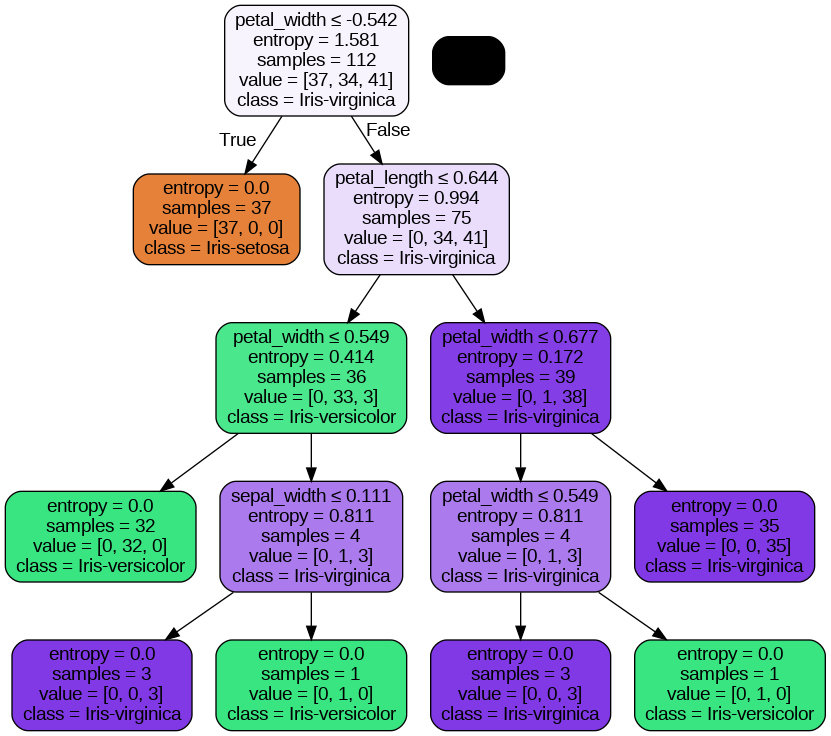

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('prediction.png')
Image(graph.create_png())


#Part2. Gini Impurity

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

**Predicting the Test set results**

In [ ]:
y_pred = classifier.predict(X_test)

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


0.9736842105263158

**Visualising the Training set results**

In [ ]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

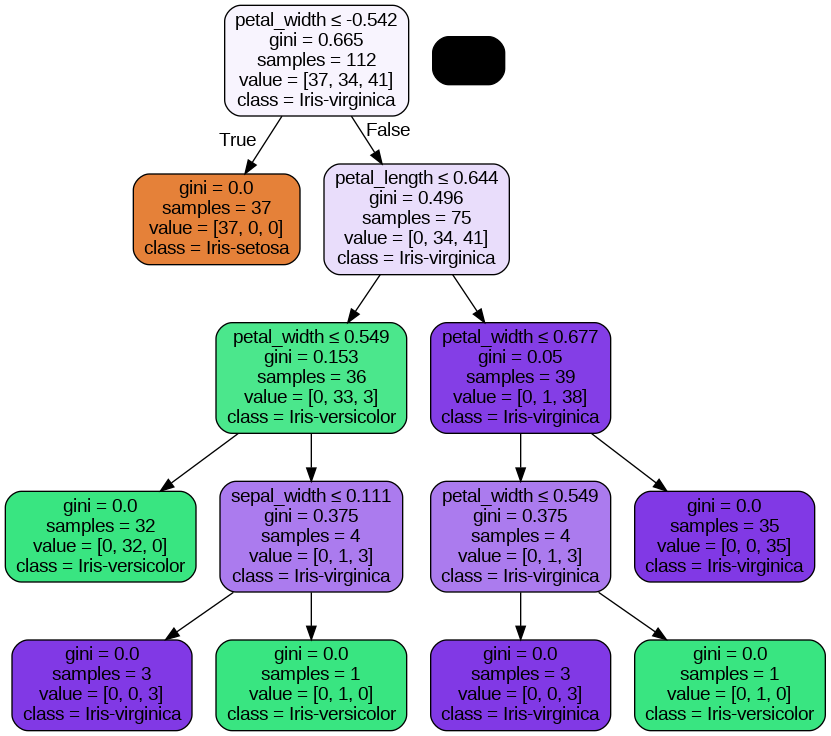

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('prediction.png')
Image(graph.create_png())


#Part3. Log_Loss

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'log_loss', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', random_state=0)

**Predicting the Test set results**

In [ ]:
y_pred = classifier.predict(X_test)

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


0.9736842105263158

**Visualising the Training set results**

In [ ]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

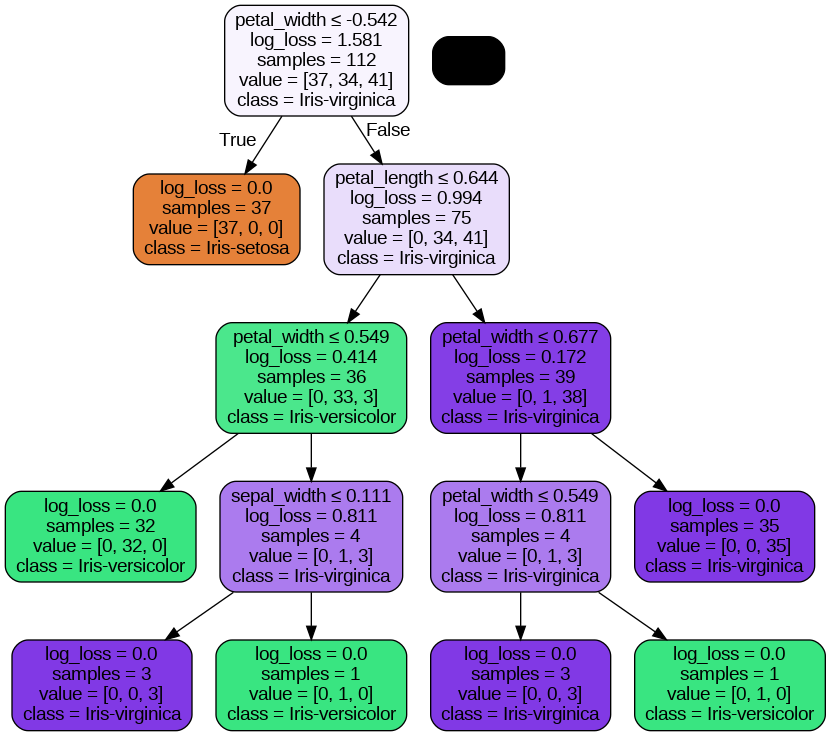

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['Iris-setosa', 'Iris-versicolor','Iris-virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('prediction.png')
Image(graph.create_png())


**MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
dataset = pd.read_csv('/content/drive/MyDrive/dataset_iris.csv')
# Remove leading and trailing spaces from column names
dataset.columns = dataset.columns.str.strip()

X_raw = dataset.drop('Target_Class',axis=1)
y_raw = dataset.Target_Class
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size = 0.25, random_state = 0)
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


0.9736842105263158

**StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
dataset = pd.read_csv('/content/drive/MyDrive/dataset_iris.csv')
# Remove leading and trailing spaces from column names
dataset.columns = dataset.columns.str.strip()

X_raw = dataset.drop('Target_Class',axis=1)
y_raw = dataset.Target_Class
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size = 0.25, random_state = 0)
mm =StandardScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


0.9736842105263158

In [ ]:
from sklearn.preprocessing import RobustScaler
dataset = pd.read_csv('/content/drive/MyDrive/dataset_iris.csv')
# Remove leading and trailing spaces from column names
dataset.columns = dataset.columns.str.strip()

X_raw = dataset.drop('Target_Class',axis=1)
y_raw = dataset.Target_Class
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size = 0.25, random_state = 0)
scaler = RobustScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


0.9736842105263158